# Optical Flow

Optical flow tracks objects by looking at where the *same* points have moved from one image frame to the next. Let's load in a few example frames of a pacman-like face moving to the right and down and see how optical flow finds **motion vectors** that describe the motion of the face!

As usual, let's first import our resources and read in the images.

In [2]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [4]:
frame_1 = cv2.imread("pacman_1.png")
frame_2 = cv2.imread("pacman_2.png")
frame_3 = cv2.imread("pacman_3.png")

frame_1 = cv2.cvtColor(frame_1,cv2.COLOR_BGR2RGB)
frame_2 = cv2.cvtColor(frame_2,cv2.COLOR_BGR2RGB)
frame_3 = cv2.cvtColor(frame_3,cv2.COLOR_BGR2RGB)


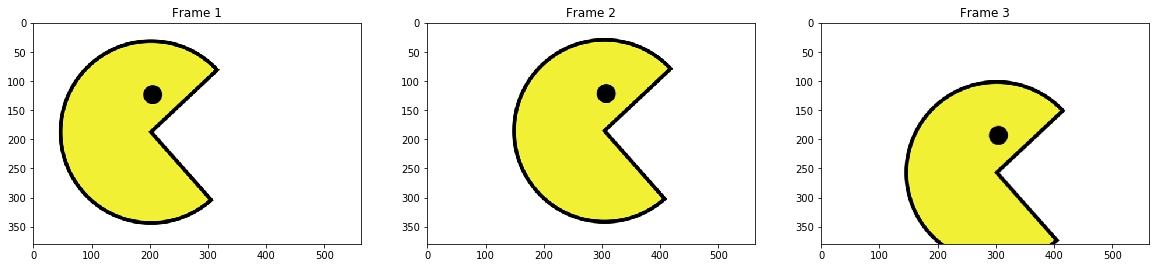

In [9]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,10))
ax1.set_title("Frame 1")
ax1.imshow(frame_1)
ax2.set_title("Frame 2")
ax2.imshow(frame_2)
ax3.set_title("Frame 3")
ax3.imshow(frame_3)

## Finding Points to Track

Befor optical flow can work, we have to give it a set of *keypoints* to track between two image frames!

In the below example, we use a **Shi-Tomasi corner detector**, which uses the same process as a Harris corner detector to find patterns of intensity that make up a "corner" in an image, only it adds an additional parameter that helps select the most prominent corners. You can read more about this detection algorithm in [the documentation](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_shi_tomasi/py_shi_tomasi.html). 

Alternatively, you could choose to use Harris or even ORB to find feature points. I just found that this works well.

**You sould see that the detected points appear at the corners of the face.**

[[[318.  82.]]

 [[308. 304.]]

 [[208. 188.]]

 [[309.  81.]]

 [[299. 304.]]

 [[199. 188.]]]


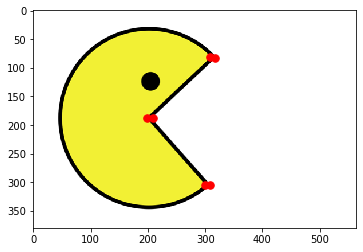

In [11]:
#parameters 
features_params= dict ( maxCorners = 10,
                    qualityLevel= 0.2,
                    minDistance = 5,
                    blockSize = 5)
gray_1 = cv2.cvtColor(frame_1,cv2.COLOR_RGB2GRAY)
gray_2 = cv2.cvtColor(frame_2,cv2.COLOR_RGB2GRAY)
gray_3 = cv2.cvtColor(frame_3,cv2.COLOR_RGB2GRAY)

pts_1 = cv2.goodFeaturesToTrack(gray_1,mask=None,**features_params)
plt.imshow(frame_1)
for p in pts_1:
    plt.plot(p[0][0],p[0][1],'r.',markersize=15)
    
print(pts_1)

## Perform Optical Flow

Once we've detected keypoints on our initial image of interest, we can calculate the optical flow between this image frame (frame 1) and the next frame (frame 2), using OpenCV's `calcOpticalFlowPyrLK` which is [documented, here](https://docs.opencv.org/trunk/dc/d6b/group__video__track.html#ga473e4b886d0bcc6b65831eb88ed93323). It takes in an initial image frame, the next image, and the first set of points, and it returns the detected points in the next frame and a value that indicates how good matches are between points from one frame to the next.

The parameters also include a window size and maxLevels that indicate the size of a window and mnumber of levels that will be used to scale the given images using pyramid scaling; this version peforms an iterative search for matching points and this matching criteria is reflected in the last parameter (you may need to change these values if you are working with a different image, but these should work for the provided example).

In [13]:
lr_params = dict(winSize = (5,5),
                maxLevel=2,
                criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

pts_2,match,err = cv2.calcOpticalFlowPyrLK(frame_1,frame_2,pts_1,None,**lr_params)

good_new = pts_2[match==1]
good_old = pts_1[match==1]

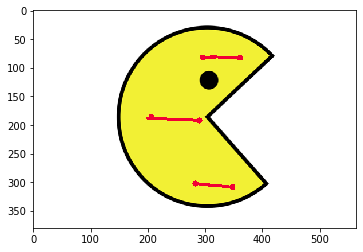

In [14]:
mask = np.zeros_like(frame_2)
for i,(new,old) in enumerate(zip(good_new,good_old)):
    (a,b) = new.ravel()
    
    (c,d) = old.ravel()
    
    mask=cv2.circle(mask,(a,b),5,(0,255,0),-1)
    
    mask = cv2.line(mask,(a,b),(c,d),(0,255,0),3)
    
comp_image = np.copy(frame_2)

comp_image[mask!=0]=[0]

plt.imshow(comp_image)
    

### TODO: Perform Optical Flow between image frames 2 and 3

Repeat this process but for the last two image frames; see what the resulting motion vectors look like. Imagine doing this for a series of image frames and plotting the entire-motion-path of a given object.


array([[[420.,  80.]],

       [[410., 302.]],

       [[310., 186.]],

       [[411.,  79.]],

       [[401., 302.]],

       [[301., 186.]]], dtype=float32)

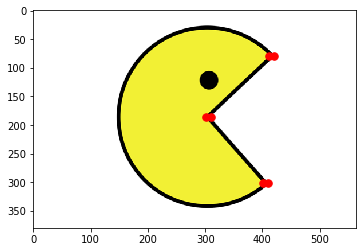

In [16]:
pts_2 = cv2.goodFeaturesToTrack(gray_2,mask=None,**features_params)

plt.imshow(frame_2)

for p in pts_2:
    plt.plot(p[0][0],p[0][1],'r.',markersize=15)
    
pts_2

In [17]:
pts_3,match,err = cv2.calcOpticalFlowPyrLK(frame_2,frame_3,pts_2,None,**lr_params)

good_new1 = pts_3[match==1]
good_old1 = pts_2[match==1]

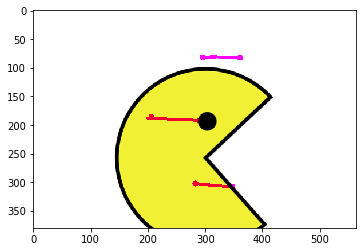

In [18]:
mask1 = np.zeros_like(frame_3)

for i,(new,old) in enumerate(zip(good_new1,good_old1)):
    (e,f) = new.ravel()
    
    (g,h) = old.ravel()
    
    mask1 = cv2.circle(mask1,(e,f),5,(0,255,0),-1)
    
    mask1 = cv2.line(mask1,(e,f),(g,h),(0,255,0),3)
    
comp_image1 = np.copy(frame_3)

comp_image1[mask!=0] = [0]

plt.imshow(comp_image1)

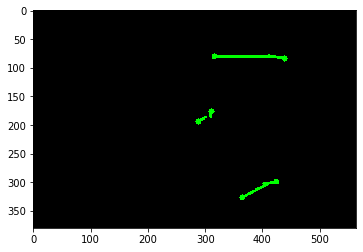

In [21]:
plt.imshow(mask1)